In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

df = pd.read_excel ('bearing-unsup.xlsx')
display(df)
df.drop(df.columns[0], axis=1,inplace=True)
display(df)
X_conAnomalias = np.array(df)

,Unnamed: 0,rps,p2p,std,kurt,entro,crest,skewness,cenfreq,stdfreq,domfreq
0,0,14.307969,0.034390,0.003851,0.713983,14.106049,4.790768,0.046665,3419.720323,7775.145046,4955
1,1,15.024038,0.033479,0.004023,0.241707,14.191996,4.619703,-0.136264,3538.439582,8322.224662,4955
2,2,15.024038,0.031518,0.004195,0.132659,14.199525,3.935607,0.026957,3325.971210,7672.572125,4955
3,3,15.578686,0.033915,0.004205,0.267163,14.180472,4.042173,-0.054884,2496.585106,3596.784408,4955
4,4,16.276042,0.029362,0.004354,-0.012080,14.242593,3.620787,0.048537,3607.763602,8562.095291,4955
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,21.701389,0.553307,0.029428,19.559926,12.320488,9.943409,0.141315,3025.695834,4877.364036,1120
2996,2996,21.701389,0.559233,0.022701,23.230680,12.744078,12.554286,-0.292716,4927.933014,11458.398483,1595
2997,2997,21.701389,0.751598,0.028305,33.674119,12.102589,14.342625,-0.082989,4892.559843,11078.956062,1145
2998,2998,21.909674,0.559624,0.029708,17.693031,12.659644,9.466071,-0.119495,3356.100238,7077.069023,1155


,rps,p2p,std,kurt,entro,crest,skewness,cenfreq,stdfreq,domfreq
0,14.307969,0.034390,0.003851,0.713983,14.106049,4.790768,0.046665,3419.720323,7775.145046,4955
1,15.024038,0.033479,0.004023,0.241707,14.191996,4.619703,-0.136264,3538.439582,8322.224662,4955
2,15.024038,0.031518,0.004195,0.132659,14.199525,3.935607,0.026957,3325.971210,7672.572125,4955
3,15.578686,0.033915,0.004205,0.267163,14.180472,4.042173,-0.054884,2496.585106,3596.784408,4955
4,16.276042,0.029362,0.004354,-0.012080,14.242593,3.620787,0.048537,3607.763602,8562.095291,4955
...,...,...,...,...,...,...,...,...,...,...
2995,21.701389,0.553307,0.029428,19.559926,12.320488,9.943409,0.141315,3025.695834,4877.364036,1120
2996,21.701389,0.559233,0.022701,23.230680,12.744078,12.554286,-0.292716,4927.933014,11458.398483,1595
2997,21.701389,0.751598,0.028305,33.674119,12.102589,14.342625,-0.082989,4892.559843,11078.956062,1145
2998,21.909674,0.559624,0.029708,17.693031,12.659644,9.466071,-0.119495,3356.100238,7077.069023,1155


### Ejercicio 1

In [37]:
clf = OneClassSVM(kernel='rbf', nu=0.033).fit(X_conAnomalias)
y_predict = clf.predict(X_conAnomalias)

X = X_conAnomalias[y_predict == 1]

### Ejercicio 2

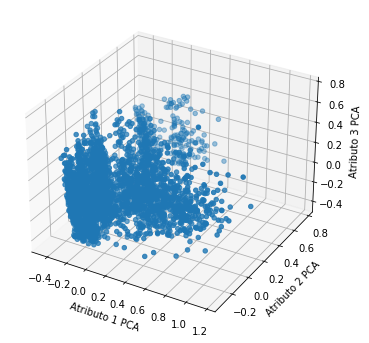

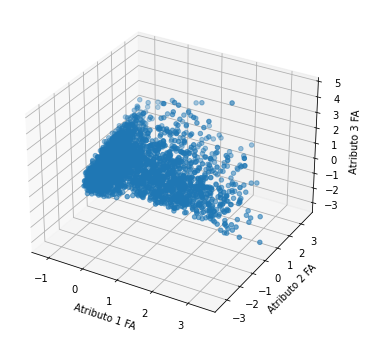

In [38]:
scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
X_p = pca.fit(X_scaled)
X_p = pca.transform(X_scaled)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_p[:, 0], X_p[:, 1], X_p[:, 2])
ax.set_xlabel("Atributo 1 PCA"), ax.set_ylabel("Atributo 2 PCA"), ax.set_zlabel("Atributo 3 PCA")
plt.show()

fa = FactorAnalysis(n_components=3)
X_f = fa.fit(X_scaled)
X_f = fa.transform(X_scaled)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X_f[:, 0], X_f[:, 1], X_f[:, 2])
ax.set_xlabel("Atributo 1 FA"), ax.set_ylabel("Atributo 2 FA"), ax.set_zlabel("Atributo 3 FA")
plt.show()

# En las figuras se visualiza que se tiene una mejor agrupacion de datos respecto a sus caracteristicas en PCA que en FA, 
# ya que en la segunda mencionada no se diferencian agrupaciones entre si.

### Ejercicio 3

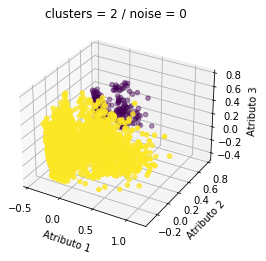

In [53]:
estimator = DBSCAN(eps=0.25, min_samples=2)#1-2, 0.5-3
estimator.fit(X_p[:, [0, 1, 2]])
labels = estimator.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #cantidad grupos
n_noise = list(labels).count(-1) #observaciones ruido
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_p[:, 0], X_p[:, 1], X_p[:, 2], c=labels.astype(float))
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
ax.set_title('clusters = ' + str(n_clusters) + ' / ' + 'noise = ' + str(n_noise))
#set_labels()
plt.show()

#No es posible lograr un buen agrupamiento considerando ciertos valores de eps y min_samples, se obtienen cluster que no estan
# bien representados o se obtienen muchos "noises" en el gráfico 

### Ejercicio 4

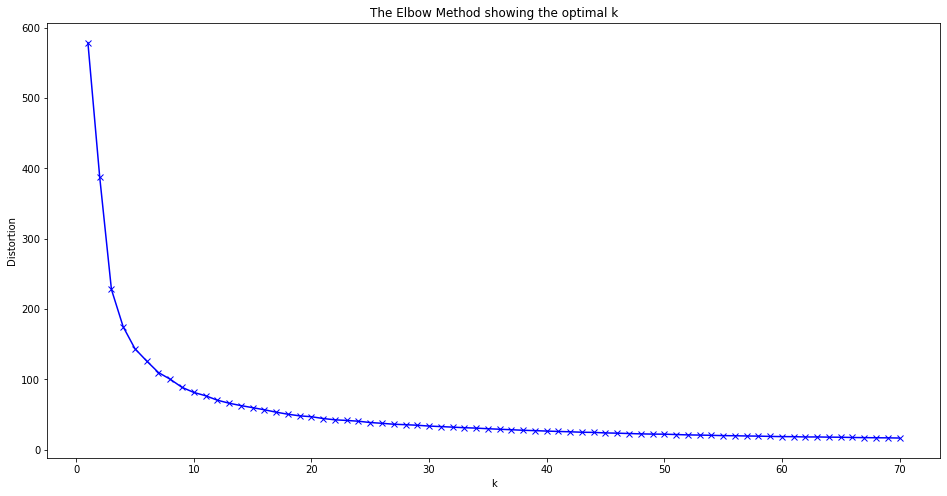

In [45]:
# Los metodos encontrados para clasificar los clusters fueron 3: Elbow method, gap statistics y dologram
# En esta ocasion se utilizara Elbow method, que es visualizar el codo en el grafico hecho abajo, ya que es el mas optimo
distortions = []
K = range(1,71)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_p)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
# El codo esta en aproximadamente el cluster 8

### Ejercicio 5

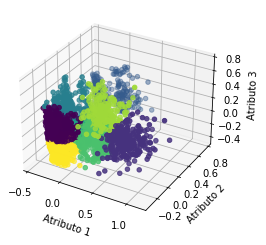

In [54]:
estimator = KMeans(n_clusters=8)
estimator.fit(X_p[:, [0, 1, 2]])
labels = estimator.labels_
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_p[:, 0], X_p[:, 1], X_p[:, 2], c=labels.astype(float)) 
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
plt.show()

#Se logra obtener un buen agrupamiento conociendo un aproximado del numero de clusters optimo, como se muestra en la figura
#donde estan bien clasificados las variables

### Ejercicio 6

[[-0.17405127 -0.23044624  0.11548649]
 [ 0.65178693  0.00385011 -0.0246622 ]
 [-0.17630364  0.68001803 -0.04553321]
 [-0.22408407  0.00925425  0.26137076]
 [-0.1810046   0.04073757 -0.12567558]
 [ 0.2126996   0.00587863 -0.07584475]
 [ 0.28534661  0.03775108  0.28405578]
 [-0.12114287 -0.2359411  -0.18502599]]


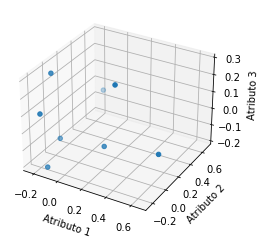

Los centros en 10 dimensiones son los siguientes:
[[ 0.73215924  0.06763932  0.17523769  0.01508169  0.9773325   0.29664503
   0.02028982  0.58489376  0.59292797  0.06246618]
 [ 0.78874901  0.50959474  0.63522113  0.28876417  0.85158326  0.68291504
  -0.06679702  0.48937882  0.33969556  0.2227161 ]
 [ 0.63166563  0.11200639  0.30988106 -0.00576519  0.97892777  0.24586557
  -0.02369437  0.54721528  0.46343746  0.95775586]
 [ 0.7128025   0.06926908  0.21453753 -0.00561353  0.98386087  0.26123025
   0.00127099  0.67581184  0.72222895  0.29104512]
 [ 0.68880301  0.06087807  0.18095037  0.00516966  0.98029715  0.27652322
   0.02049705  0.47254214  0.39625359  0.3417051 ]
 [ 0.73790461  0.27205167  0.39294743  0.13961573  0.91943137  0.46958649
  -0.01985964  0.48069735  0.37117309  0.26838914]
 [ 0.76633411  0.3437208   0.4952086   0.16649375  0.90543209  0.50673524
  -0.05263306  0.66820969  0.65557182  0.27032384]
 [ 0.7185676   0.0695085   0.15423123  0.03066122  0.9715771   0.31952632
 

In [56]:
center = estimator.cluster_centers_
print(center)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(center[:, 0], center[:, 1], center[:, 2])
ax.set_xlabel("Atributo 1"), ax.set_ylabel("Atributo 2"), ax.set_zlabel("Atributo 3")
plt.show()

#transformando a dimensionalidad 10 los centros

center_diez = pca.inverse_transform(center)

print('Los centros en 10 dimensiones son los siguientes:')
print(center_diez)
